# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [28]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [40]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [30]:
tab_sex = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab_sex

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [31]:
tab_sex['media_doentes'] = (tab_sex[0] + tab_sex[1]) / 2
tab_sex['risco_do_evento'] = tab_sex[1]/tab_sex['All']
tab_sex['odds'] = tab_sex[1]/tab_sex[0]
tab_sex['odds_ratio_all'] = tab_sex['odds']/tab_sex.loc['All','odds']
tab_sex['logito'] = np.log(tab_sex['odds'])
tab_sex['WOE'] = np.log(tab_sex['odds_ratio_all'])

tab_sex

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
sex,,,,,,,,,
0.0,72,25,97,48.5,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,103.0,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [42]:
# Usando qcut para dividir as ocorrências de age em 5 categorias distintas e com frequência similar
df['cat_age'] = pd.qcut(df['age'], 5, precision=0)

# Crosstab com cat_age e flag_doente
tab_age = pd.crosstab(df['cat_age'], df['flag_doente'], margins=True)
tab_age

flag_doente,0,1,All
cat_age,,,
"(28.0, 45.0]",47,16,63
"(45.0, 53.0]",42,22,64
"(53.0, 58.0]",32,39,71
"(58.0, 62.0]",13,32,45
"(62.0, 77.0]",30,30,60
All,164,139,303


In [43]:
tab_age['media_doentes'] = (tab_age[0] + tab_age[1]) / 2
tab_age['risco_do_evento'] = tab_age[1]/tab_age['All']
tab_age['odds'] = tab_age[1]/tab_age[0]
tab_age['odds_ratio_all'] = tab_age['odds']/tab_age.loc['All','odds']
tab_age['logito'] = np.log(tab_age['odds'])
tab_age['WOE'] = np.log(tab_age['odds_ratio_all'])

tab_age

flag_doente,0,1,All,media_doentes,risco_do_evento,odds,odds_ratio_all,logito,WOE
cat_age,,,,,,,,,
"(28.0, 45.0]",47,16,63,31.5,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,32.0,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,35.5,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,22.5,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,30.0,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,151.5,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

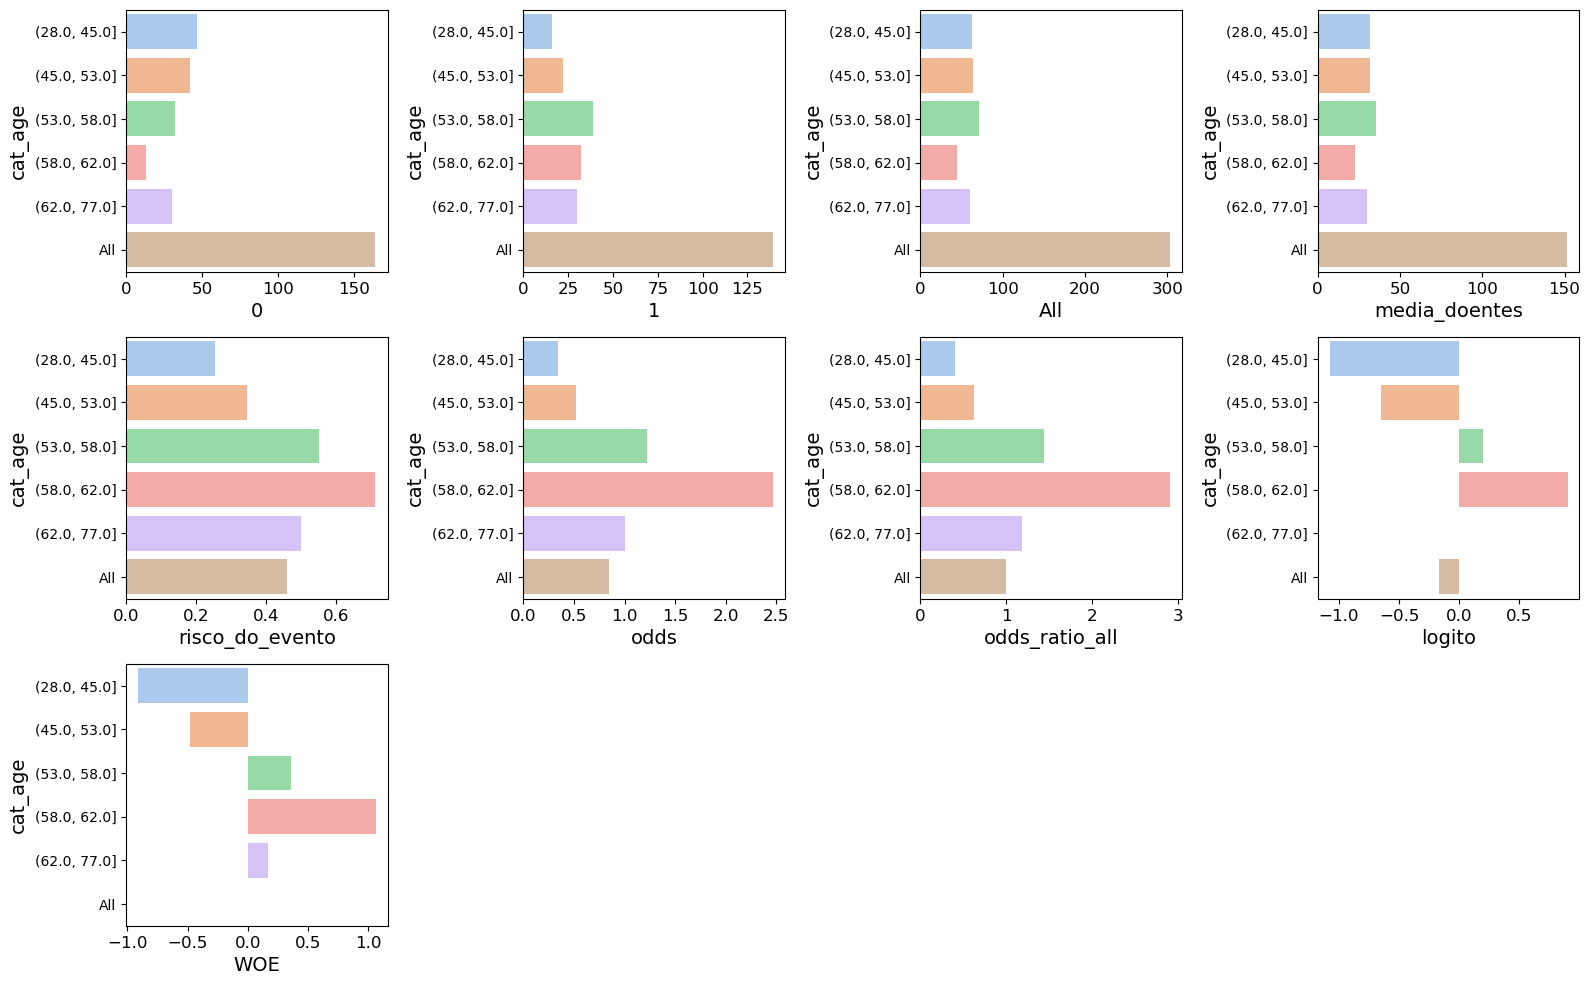

In [89]:
plt.figure(figsize=(16, 16))

for i, col in enumerate(tab_age.columns):
    ax = plt.subplot(5, 4, i+1)
    ax = sns.barplot(tab_age, x=tab_age[col], y=tab_age.index, ax=ax, palette='pastel', orient='h')
    ax.set_xlabel(tab_age[col].name, fontsize=14)
    ax.set_ylabel('cat_age', fontsize=14)
    plt.xticks(fontsize=12)
plt.tight_layout()